In [1]:
import pandas as pd 

df = pd.read_csv(
    'https://covid.ourworldindata.org/data/owid-covid-data.csv', 
    usecols=['date', 'location', 'total_cases_per_million', 'reproduction_rate', 'people_fully_vaccinated_per_hundred', 'total_vaccinations', 'population', 'life_expectancy'], 
    parse_dates=['date'])

df.dropna(inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11452 entries, 442 to 101544
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   location                             11452 non-null  object        
 1   date                                 11452 non-null  datetime64[ns]
 2   total_cases_per_million              11452 non-null  float64       
 3   reproduction_rate                    11452 non-null  float64       
 4   total_vaccinations                   11452 non-null  float64       
 5   people_fully_vaccinated_per_hundred  11452 non-null  float64       
 6   population                           11452 non-null  float64       
 7   life_expectancy                      11452 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 805.2+ KB
None


In [2]:
df1 = df.query('population > 50000000 and life_expectancy > 78')
df1.to_csv('covid_data.csv', sep='\t', encoding='utf-8')
print(df1['location'].unique())

['France' 'Germany' 'Italy' 'Japan' 'South Korea' 'United Kingdom'
 'United States']


In [3]:
print(df1.groupby(['location'])['total_cases_per_million'].max())


location
France             88488.363
Germany            44656.169
Italy              70575.190
Japan               6438.503
South Korea         3225.017
United Kingdom     74242.991
United States     102085.301
Name: total_cases_per_million, dtype: float64


In [4]:
print(df1.groupby(['location'])['people_fully_vaccinated_per_hundred'].max())


location
France            36.10
Germany           41.19
Italy             35.97
Japan             16.84
South Korea       11.09
United Kingdom    50.64
United States     47.33
Name: people_fully_vaccinated_per_hundred, dtype: float64


<AxesSubplot:title={'center':'Total cases per million'}, xlabel='date'>

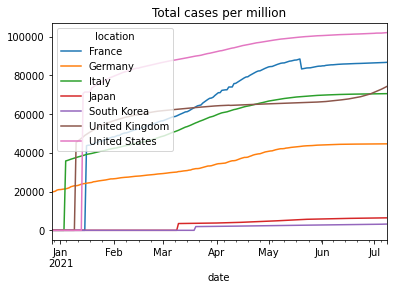

In [6]:
import matplotlib.pyplot as plt

tcpm = pd.pivot_table(
    data=df1,                                   # What dataframe to use
    index='date',                               # The "rows" of your dataframe
    columns='location',                         # What values to show as columns
    values='total_cases_per_million',           # What values to aggregate
    aggfunc='mean',                             # How to aggregate data
    )
tcpm = tcpm.fillna(method='ffill').fillna(0)
tcpm.plot(title='Total cases per million')


<AxesSubplot:title={'center':'Total fully vaccinations per hundred'}, xlabel='date'>

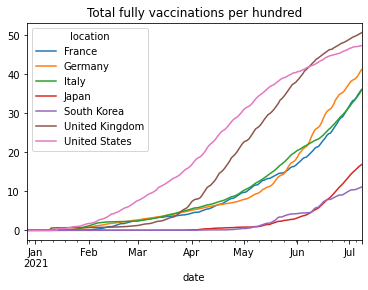

In [7]:
tvph = pd.pivot_table(
    data=df1,                                   # What dataframe to use
    index='date',                               # The "rows" of your dataframe
    columns='location',                         # What values to show as columns
    values='people_fully_vaccinated_per_hundred',           # What values to aggregate
    aggfunc='mean',                             # How to aggregate data
    )
tvph = tvph.fillna(method='ffill').fillna(0)
tvph.plot(title='Total fully vaccinations per hundred')

<AxesSubplot:title={'center':'Reproduction rate'}, xlabel='date'>

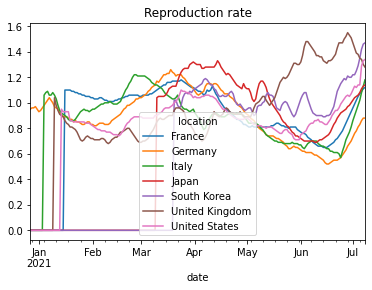

In [8]:
rert = pd.pivot_table(
    data=df1,                                   # What dataframe to use
    index='date',                               # The "rows" of your dataframe
    columns='location',                         # What values to show as columns
    values='reproduction_rate',           # What values to aggregate
    aggfunc='mean',                             # How to aggregate data
    )
rert = rert.fillna(method='ffill').fillna(0)
rert.plot(title='Reproduction rate')

<AxesSubplot:title={'center':'Vaccination rate'}, xlabel='location'>

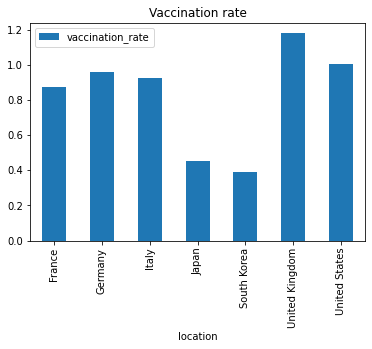

In [9]:
import matplotlib.pyplot as plt

sdf1 = df1.groupby(['location'])['total_vaccinations'].max()
sdf2 = df1.groupby(['location'])['population'].max()
sdf = pd.concat([sdf1, sdf2], axis=1)
sdf['vaccination_rate'] = sdf['total_vaccinations'] / sdf['population']
sdf.plot.bar(y='vaccination_rate', title='Vaccination rate')

